#                                                   Property Price Prediction

#### Abstract:

A key challenge for property sellers is to determine the sale price of the property. The 
ability to predict the exact property value is beneficial for property investors as well as 
for buyers to plan their finances according to the price trend. The property prices 
depend on the number of features like the property area, basement square footage, year 
built, number of bedrooms, and so on.

## Problem Statement:

Use regression analysis to predict the price of a propert

## Scope:

● Exploratory data analysis

● Feature selection using various criteria

● Training linear regression model for prediction

Learning Outcome:

The students will get a better understanding of how the variables are linked to each 
other and how the EDA approach will help them gain more insights and knowledge 
about the data that we have

# Importing the required libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


In [2]:
df= pd.read_csv("HousePrices.csv")
df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Check for Null Values

In [3]:
df.isnull().sum()

Id                       0
Dwell_Type               0
Zone_Class               0
LotFrontage            320
LotArea                  0
                      ... 
MoSold                   0
YrSold                   0
SaleType                 0
SaleCondition            0
Property_Sale_Price      0
Length: 81, dtype: int64

Seperating categorical variables from the original table

In [5]:
df_cat=df[["Zone_Class","Road_Type","Alley","Property_Shape","LandContour","Utilities","LotConfig","LandSlope","Neighborhood","Condition1","Condition2","Dwelling_Type","HouseStyle","OverallQual","OverallCond","RoofStyle","RoofMatl","Exterior1st","Exterior2nd","MasVnrType","ExterQual","ExterCond","Foundation","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","Heating","HeatingQC",'CentralAir', 'Electrical','BsmtFullBath', 'BsmtHalfBath','FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual','TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType','GarageFinish', 'GarageCars','GarageQual','GarageCond', 'PavedDrive','PoolQC','Fence', 'MiscFeature', 'MiscVal', 'MoSold','SaleType','SaleCondition']]

In [6]:
df_cat.head()

,Zone_Class,Road_Type,Alley,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,NaN,NaN,NaN,0,2,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,TA,Y,NaN,NaN,NaN,0,5,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,TA,Y,NaN,NaN,NaN,0,9,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,TA,TA,Y,NaN,NaN,NaN,0,2,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,TA,Y,NaN,NaN,NaN,0,12,WD,Normal


In [7]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 56 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Zone_Class      2073 non-null   object
 1   Road_Type       2073 non-null   object
 2   Alley           129 non-null    object
 3   Property_Shape  2073 non-null   object
 4   LandContour     2073 non-null   object
 5   Utilities       2073 non-null   object
 6   LotConfig       2073 non-null   object
 7   LandSlope       2073 non-null   object
 8   Neighborhood    2073 non-null   object
 9   Condition1      2073 non-null   object
 10  Condition2      2073 non-null   object
 11  Dwelling_Type   2073 non-null   object
 12  HouseStyle      2073 non-null   object
 13  OverallQual     2073 non-null   int64 
 14  OverallCond     2073 non-null   int64 
 15  RoofStyle       2073 non-null   object
 16  RoofMatl        2073 non-null   object
 17  Exterior1st     2073 non-null   object
 18  Exterior

In [8]:
df.isnull().sum() 

Id                       0
Dwell_Type               0
Zone_Class               0
LotFrontage            320
LotArea                  0
                      ... 
MoSold                   0
YrSold                   0
SaleType                 0
SaleCondition            0
Property_Sale_Price      0
Length: 81, dtype: int64

We are dropping Alley, miscfeature, PoolQC, fence coz of high missing values


In [9]:
df_cat= df_cat.drop(["Alley","MiscFeature","PoolQC","Fence"],axis=1)
df_cat.head() 

,Zone_Class,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageType,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,MiscVal,MoSold,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,0,2,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,Attchd,RFn,2,TA,TA,Y,0,5,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Attchd,RFn,2,TA,TA,Y,0,9,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,Detchd,Unf,3,TA,TA,Y,0,2,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,Attchd,RFn,3,TA,TA,Y,0,12,WD,Normal


## Filling Missing values in the categorical features using mode.

In [10]:
for i in df_cat:
    if df_cat[i].isnull().any():
        df_cat[i]=df_cat[i].fillna(df_cat[i].mode()[0])
    else:
        df_cat[i]=df_cat[i]

In [11]:
df_cat.isnull().sum()

Zone_Class        0
Road_Type         0
Property_Shape    0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
Dwelling_Type     0
HouseStyle        0
OverallQual       0
OverallCond       0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinType2      0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0
BedroomAbvGr      0
KitchenAbvGr      0
KitchenQual       0
TotRmsAbvGrd      0
Functional        0
Fireplaces        0
FireplaceQu       0
GarageType        0
GarageFinish      0
GarageCars        0
GarageQual        0
GarageCond        0
PavedDrive        0
MiscVal           0
MoSold            0


### Seperarting the numerical features from the original dataset

In [12]:
df_num= df.drop(columns=df_cat)
df_num.head()

,Id,Dwell_Type,LotFrontage,LotArea,Alley,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,YrSold,Property_Sale_Price
0,1,60,65.0,8450,NaN,2003,2003,196.0,706,0,...,61,0,0,0,0,NaN,NaN,NaN,2008,208500
1,2,20,80.0,9600,NaN,1976,1976,0.0,978,0,...,0,0,0,0,0,NaN,NaN,NaN,2007,181500
2,3,60,68.0,11250,NaN,2001,2002,162.0,486,0,...,42,0,0,0,0,NaN,NaN,NaN,2008,223500
3,4,70,60.0,9550,NaN,1915,1970,0.0,216,0,...,35,272,0,0,0,NaN,NaN,NaN,2006,140000
4,5,60,84.0,14260,NaN,2000,2000,350.0,655,0,...,84,0,0,0,0,NaN,NaN,NaN,2008,250000


In [13]:
df_num= df_num.drop(["Alley","MiscFeature","PoolQC","Fence"],axis=1)
df_num.head()

,Id,Dwell_Type,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,Property_Sale_Price
0,1,60,65.0,8450,2003,2003,196.0,706,0,150,...,2003.0,548,0,61,0,0,0,0,2008,208500
1,2,20,80.0,9600,1976,1976,0.0,978,0,284,...,1976.0,460,298,0,0,0,0,0,2007,181500
2,3,60,68.0,11250,2001,2002,162.0,486,0,434,...,2001.0,608,0,42,0,0,0,0,2008,223500
3,4,70,60.0,9550,1915,1970,0.0,216,0,540,...,1998.0,642,0,35,272,0,0,0,2006,140000
4,5,60,84.0,14260,2000,2000,350.0,655,0,490,...,2000.0,836,192,84,0,0,0,0,2008,250000


In [14]:
df_num= df_num.drop(["Id"],axis=1)
df_num.head()


,Dwell_Type,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,Property_Sale_Price
0,60,65.0,8450,2003,2003,196.0,706,0,150,856,...,2003.0,548,0,61,0,0,0,0,2008,208500
1,20,80.0,9600,1976,1976,0.0,978,0,284,1262,...,1976.0,460,298,0,0,0,0,0,2007,181500
2,60,68.0,11250,2001,2002,162.0,486,0,434,920,...,2001.0,608,0,42,0,0,0,0,2008,223500
3,70,60.0,9550,1915,1970,0.0,216,0,540,756,...,1998.0,642,0,35,272,0,0,0,2006,140000
4,60,84.0,14260,2000,2000,350.0,655,0,490,1145,...,2000.0,836,192,84,0,0,0,0,2008,250000


In [15]:
df_num.isnull().sum()

Dwell_Type               0
LotFrontage            320
LotArea                  0
YearBuilt                0
YearRemodAdd             0
MasVnrArea              14
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
GarageYrBlt            113
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
ScreenPorch              0
PoolArea                 0
YrSold                   0
Property_Sale_Price      0
dtype: int64

Filling GarageYrBLt feature with mode.

In [16]:
df_num["GarageYrBlt"]= df_num["GarageYrBlt"].fillna(df_num["GarageYrBlt"]).mode()[0]


### Filling all the missing values in Numerical Features using mean

In [17]:
for i in df_num:
    if df_num[i].isnull().any():
        df_num[i]=df_num[i].fillna(df_num[i].mean())
    else:
        df_num[i]=df_num[i]

In [19]:
data= pd.concat([df_cat,df_num],axis=1)
data.head()

,Zone_Class,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,YrSold,Property_Sale_Price
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,2005.0,548,0,61,0,0,0,0,2008,208500
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,2005.0,460,298,0,0,0,0,0,2007,181500
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,2005.0,608,0,42,0,0,0,0,2008,223500
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,2005.0,642,0,35,272,0,0,0,2006,140000
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,2005.0,836,192,84,0,0,0,0,2008,250000


# EDA

### To check the distribution of the dependant variable

Text(0.5, 1.0, 'Distribution of Property sale price')

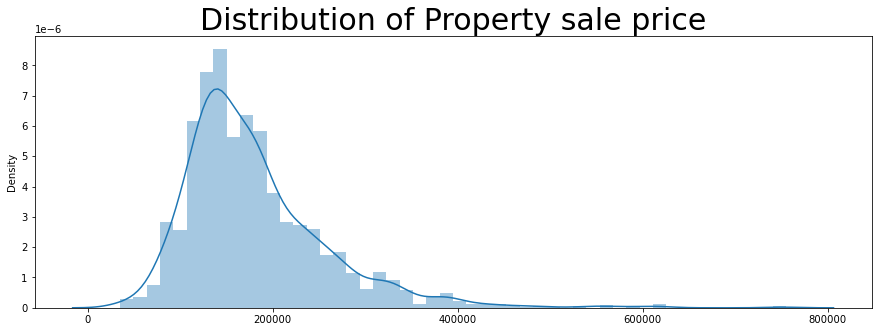

In [23]:
plt.subplots(figsize=(15,5))
sns.distplot(x=data["Property_Sale_Price"])
plt.title('Distribution of Property sale price', fontsize = 30)

This barplot is between Garage Area(Size of garage) on Shape of the property

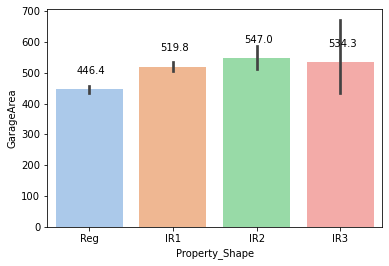

In [30]:
ax=sns.barplot(y=data["GarageArea"], x= data["Property_Shape"], data=data, palette='pastel');
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+50))

plt.show()

A pie chart representing the overall quality(in Percentage)

In [33]:
data["OverallQual"].value_counts(normalize=True)

5     0.245055
6     0.223348
7     0.200675
8     0.127834
4     0.103232
9     0.079112
3     0.009648
10    0.008201
2     0.001930
1     0.000965
Name: OverallQual, dtype: float64

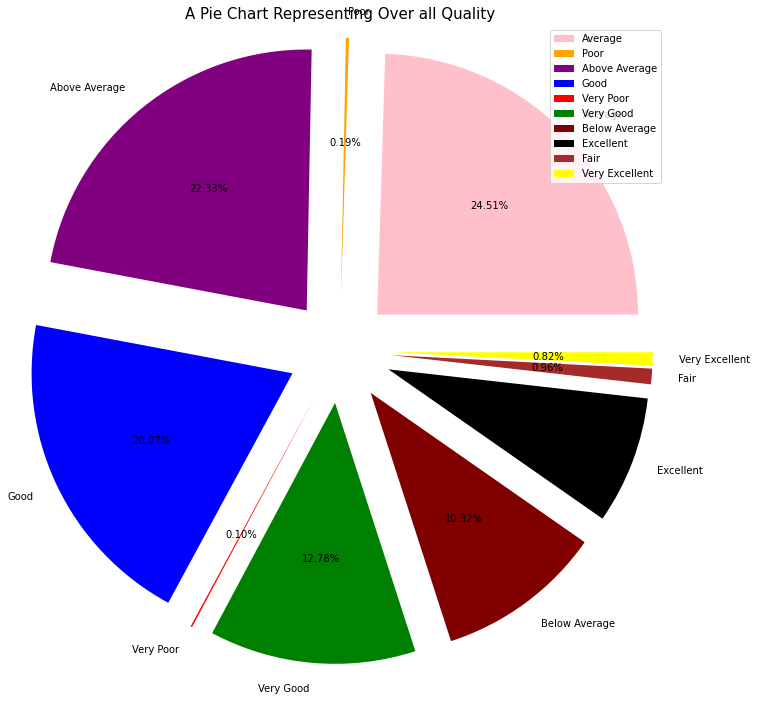

In [47]:
size = [0.245055,0.001930, 0.223348,0.200675,0.000965,0.127834,0.103232,0.079112, 0.009648,0.008201]
labels = "Average","Poor", "Above Average","Good","Very Poor","Very Good","Below Average","Excellent","Fair","Very Excellent"
colors = ['pink', 'orange',"purple","blue","red","green","maroon","black","brown","yellow"]
explode=[0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]


plt.subplots(figsize=(12,12))
plt.pie(size, labels = labels, colors = colors, explode=explode ,shadow = False, autopct = "%.2f%%")
plt.title('A Pie Chart Representing Over all Quality', fontsize = 15)
plt.axis('on')
plt.legend()
plt.show()

This graph shows the overall condition. From this average type is highest

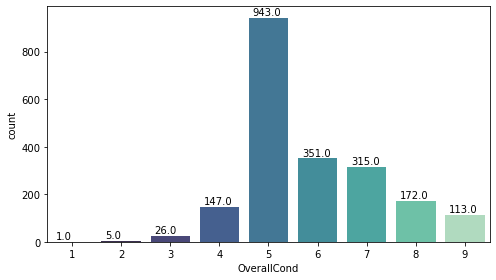

In [49]:
plt.rcParams["figure.figsize"] = [7.00, 4.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x=data["OverallCond"], data=data, palette='mako');
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.08, p.get_height()+10))

plt.show()

In [48]:
data.columns

Index(['Zone_Class', 'Road_Type', 'Property_Shape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive',
       'MiscVal', 'MoSold', 'SaleType', 'SaleCondition', 'Dwell_Type',
       'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'Low

This table shows the counts of Garage Qualtiy Ratings

In [70]:
data["GarageQual"].value_counts()

TA    1983
Fa      65
Gd      18
Ex       4
Po       3
Name: GarageQual, dtype: int64

This shows the distribution of Property sale price with the Total square feet of basement area

The Joint Grid plot shows us the univariate and bivariate plots of variables. The univariate plot of ‘YearBuilt’ shows that the distribution is skewed towards the year 2000 and has a long tail which extends till 1900. The linear relationship between the variables is clearer in cases of recently built houses.

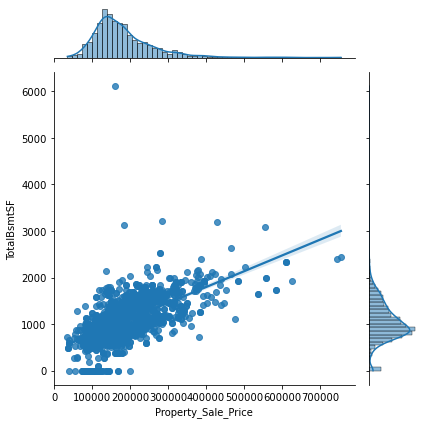

In [51]:
sns.jointplot(x='Property_Sale_Price', y='TotalBsmtSF', data=data, kind='reg')


<AxesSubplot:xlabel='Property_Sale_Price', ylabel='GrLivArea'>

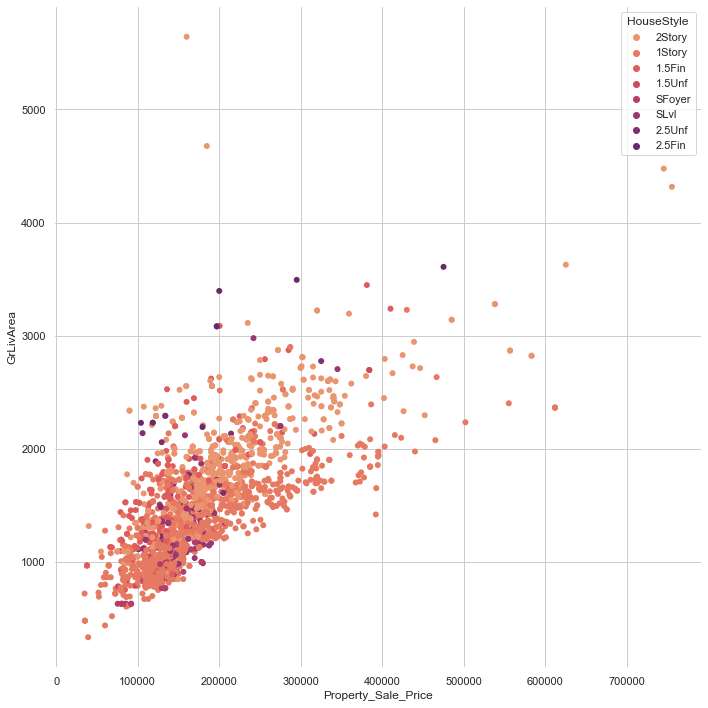

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(10, 10))
sns.despine(f, left=True, bottom=True)
sns.scatterplot(x=data["Property_Sale_Price"], y="GrLivArea",hue="HouseStyle", palette="flare", sizes=(5,10 ), linewidth=0,data=data, ax=ax)

This graph shows distribution between the property price and the zone class.

[Text(0, 0.5, '')]

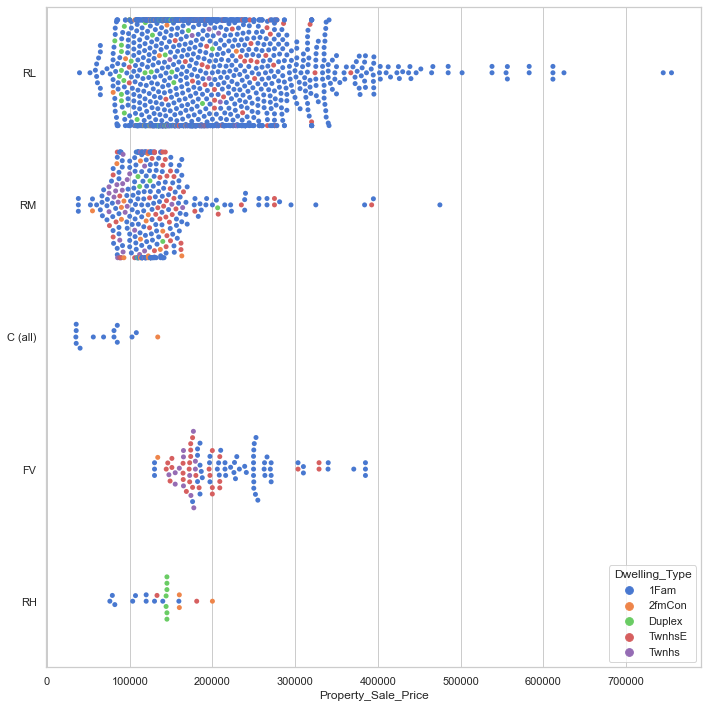

In [69]:
f, ax = plt.subplots(figsize=(10, 10))
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.swarmplot(data=data, x=data["Property_Sale_Price"], y="Zone_Class", hue="Dwelling_Type")
ax.set(ylabel="")

This boxemplot shows the distribution between Sale price and Garage qualtiy and their outliers

<AxesSubplot:xlabel='GarageQual', ylabel='Property_Sale_Price'>

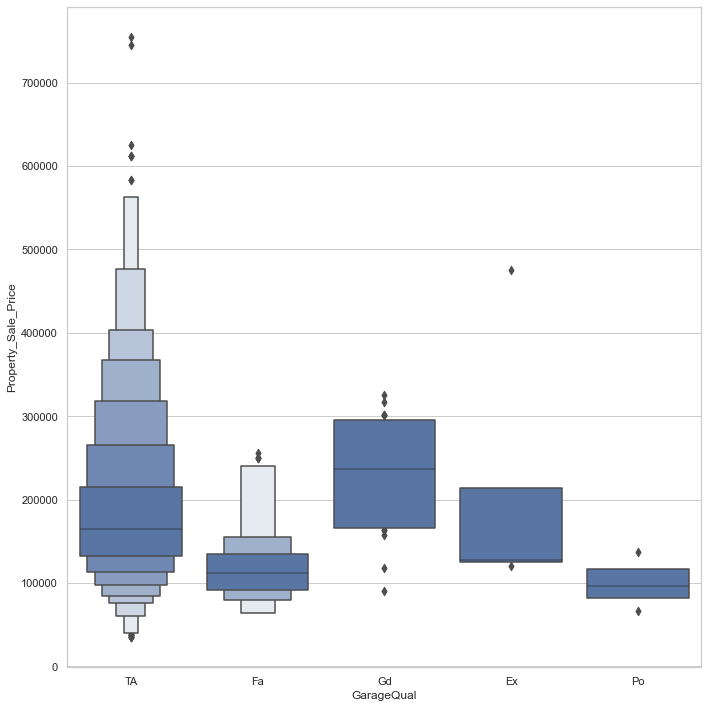

In [73]:
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 10))


sns.boxenplot(y="Property_Sale_Price", x="GarageQual",color="b",
              scale="linear", data=data)

<AxesSubplot:xlabel='GarageArea', ylabel='Property_Sale_Price'>

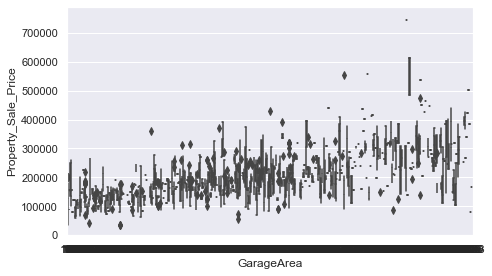

In [80]:
sns.boxplot(y='Property_Sale_Price', x = 'GarageArea', data=data)


# Feature Selection


There are 80 features totally in the dataset. In this case, we should select the required features to predict the model, for that we are using Kendall 
Tau method for selecting the categorical features. 

For the correlation value less and 0.05 and greater than 0 alone we consider it as best feautres

In [84]:
x=df_cat.copy()
y= data.iloc[:,-1]
from scipy.stats import kendalltau
for i in x.columns:
   corr,_ = kendalltau(x[i],y)
   if (corr<=0.05) & (corr>=0): 
      print("Kendall Rank correlation for ",i,"is   ",corr)

Kendall Rank correlation for  LandContour is    0.005242271170004607
Kendall Rank correlation for  LandSlope is    0.027652397394101018
Kendall Rank correlation for  Condition2 is    0.040967159763050244
Kendall Rank correlation for  Exterior2nd is    0.04950308825364529
Kendall Rank correlation for  BsmtFinType2 is    0.04328567043828766
Kendall Rank correlation for  MoSold is    0.048856111390348816


For the numerical featuers we use pearsonr test to select the best features.

In [85]:
from scipy.stats import pearsonr
p=df_num.copy()
for i in p.columns:
   corr,_ = pearsonr(p[i],y)
   if (corr<=0.05) & (corr>=0): 
      print("Pearsoncorrelation for ",i,"is   ",corr)


Pearsoncorrelation for  YrSold is    0.0017395464384083632


## Consolidating the final dataset(Selected Features)

In [86]:
data= data[["LandContour","LandSlope","Condition2","Exterior2nd","BsmtFinType2","MoSold","YrSold","Property_Sale_Price"]]
data.head()

,LandContour,LandSlope,Condition2,Exterior2nd,BsmtFinType2,MoSold,YrSold,Property_Sale_Price
0,Lvl,Gtl,Norm,VinylSd,Unf,2,2008,208500
1,Lvl,Gtl,Norm,MetalSd,Unf,5,2007,181500
2,Lvl,Gtl,Norm,VinylSd,Unf,9,2008,223500
3,Lvl,Gtl,Norm,Wd Shng,Unf,2,2006,140000
4,Lvl,Gtl,Norm,VinylSd,Unf,12,2008,250000


## Visualisation of the selected features with the dependant variable

<AxesSubplot:xlabel='YrSold', ylabel='Property_Sale_Price'>

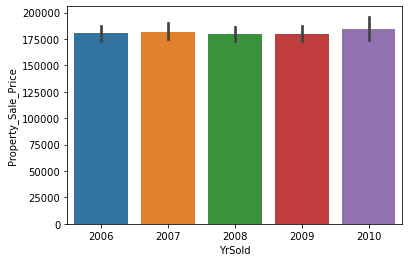

In [26]:
sns.barplot(data=data,x="YrSold",y="Property_Sale_Price")


In [27]:
data["LandContour"].value_counts(normalize=True)

Lvl    0.894356
Bnk    0.044380
HLS    0.036662
Low    0.024602
Name: LandContour, dtype: float64

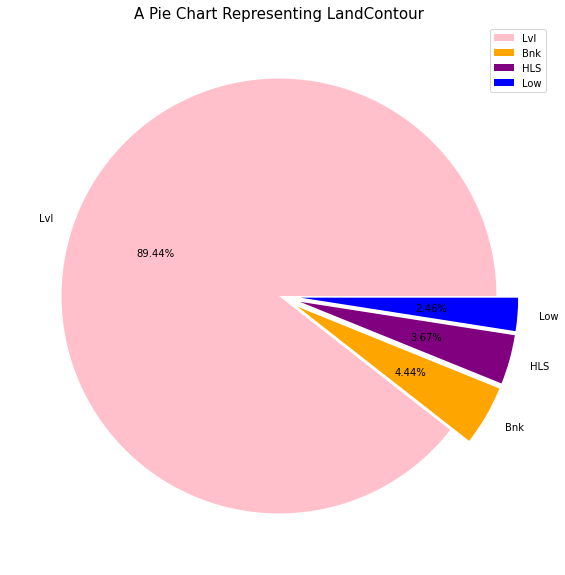

In [28]:
size = [0.894356,0.044380,0.036662,0.024602]
labels = "Lvl", "Bnk","HLS","Low"
colors = ['pink', 'orange','purple','blue']
explode = [0, 0.1,0.1,0.1]

plt.subplots(figsize=(10,10))
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = False, autopct = "%.2f%%")
plt.title('A Pie Chart Representing LandContour', fontsize = 15)
plt.axis('on')
plt.legend()
plt.show()


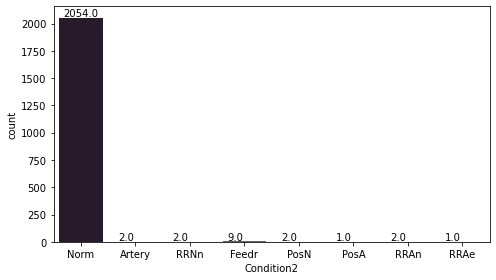

In [29]:
plt.rcParams["figure.figsize"] = [7.00, 4.00]
plt.rcParams["figure.autolayout"] = True
ax = sns.countplot(x=data["Condition2"], data=data, palette='mako');
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.08, p.get_height()+10))

plt.show()


In [30]:
data["LandSlope"].value_counts(normalize=True)

Gtl    0.944525
Mod    0.048722
Sev    0.006753
Name: LandSlope, dtype: float64

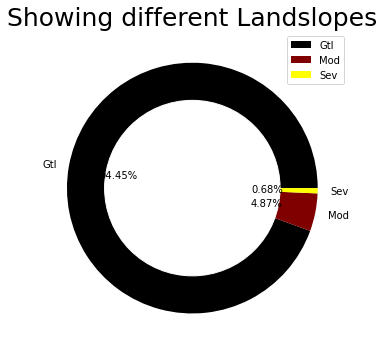

In [31]:
size = [0.944525, 0.048722, 0.006753]
colors = ['black', "maroon",'yellow']
labels = "Gtl", "Mod", "Sev"

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (5, 5)
plt.pie(size, colors = colors, labels = labels, shadow = False, autopct = '%.2f%%')
plt.title('Showing different Landslopes', fontsize = 25)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()


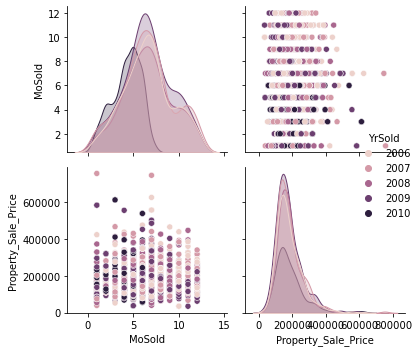

In [32]:
sns.pairplot(data, hue="YrSold")

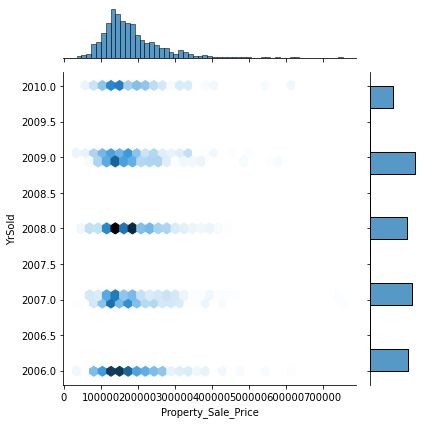

In [41]:
sns.jointplot(x='Property_Sale_Price', y='YrSold', data=data, kind='hex')



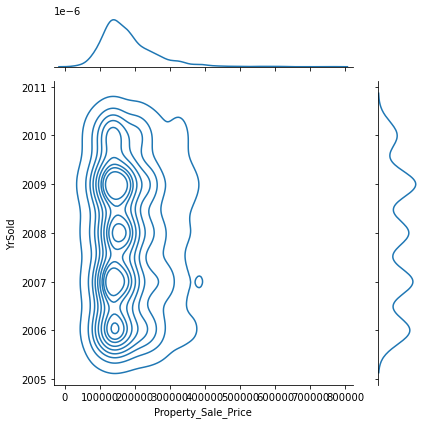

In [42]:
sns.jointplot(x='Property_Sale_Price', y='YrSold', data=data, kind='kde')

# Label Encoding and get dummies

In [87]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [88]:
x= data.iloc[:,:-1]
x.head()

,LandContour,LandSlope,Condition2,Exterior2nd,BsmtFinType2,MoSold,YrSold
0,Lvl,Gtl,Norm,VinylSd,Unf,2,2008
1,Lvl,Gtl,Norm,MetalSd,Unf,5,2007
2,Lvl,Gtl,Norm,VinylSd,Unf,9,2008
3,Lvl,Gtl,Norm,Wd Shng,Unf,2,2006
4,Lvl,Gtl,Norm,VinylSd,Unf,12,2008


In [89]:
y= data.iloc[:,-1]
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: Property_Sale_Price, dtype: int64

### We do getdummies only for the X(Categorical), because input to build the model is to be numerical

In [92]:
x=pd.get_dummies(x,drop_first=True)

In [93]:
x

,MoSold,YrSold,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,Condition2_Feedr,Condition2_Norm,Condition2_PosA,...,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf
0,2,2008,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,5,2007,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,9,2008,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,2,2006,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
4,12,2008,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,6,2009,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
2069,8,2007,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2070,6,2007,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2071,1,2009,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# Model Building

In [94]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
LR= LinearRegression()
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [95]:
from sklearn.preprocessing import MinMaxScaler
Mn= MinMaxScaler()
x_train=Mn.fit_transform(x_train)
x_test=Mn.transform(x_test)


In [96]:
LR.fit(x_train,y_train)

LinearRegression()

In [98]:
y_pred=LR.predict(x_test)

In [102]:
import statsmodels.api as sm
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())


                                 OLS Regression Results                                 
Dep. Variable:     Property_Sale_Price   R-squared (uncentered):                   0.870
Model:                             OLS   Adj. R-squared (uncentered):              0.868
Method:                  Least Squares   F-statistic:                              402.9
Date:                 Sun, 23 Jan 2022   Prob (F-statistic):                        0.00
Time:                         14:46:57   Log-Likelihood:                         -26098.
No. Observations:                 2073   AIC:                                  5.226e+04
Df Residuals:                     2039   BIC:                                  5.246e+04
Df Model:                           34                                                  
Covariance Type:             nonrobust                                                  
                          coef    std err          t      P>|t|      [0.025      0.975]
----------------------